<a href="https://colab.research.google.com/github/simongiando/deep-learning/blob/main/Practice/regression-problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Building and Evaluating a Deep Learning Model with Keras**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

Now, let's load in the dataset, split it into a training and testing set (we'll split out a validation set later), and visualize the locations of the houses to check if the data's been loaded correctly:

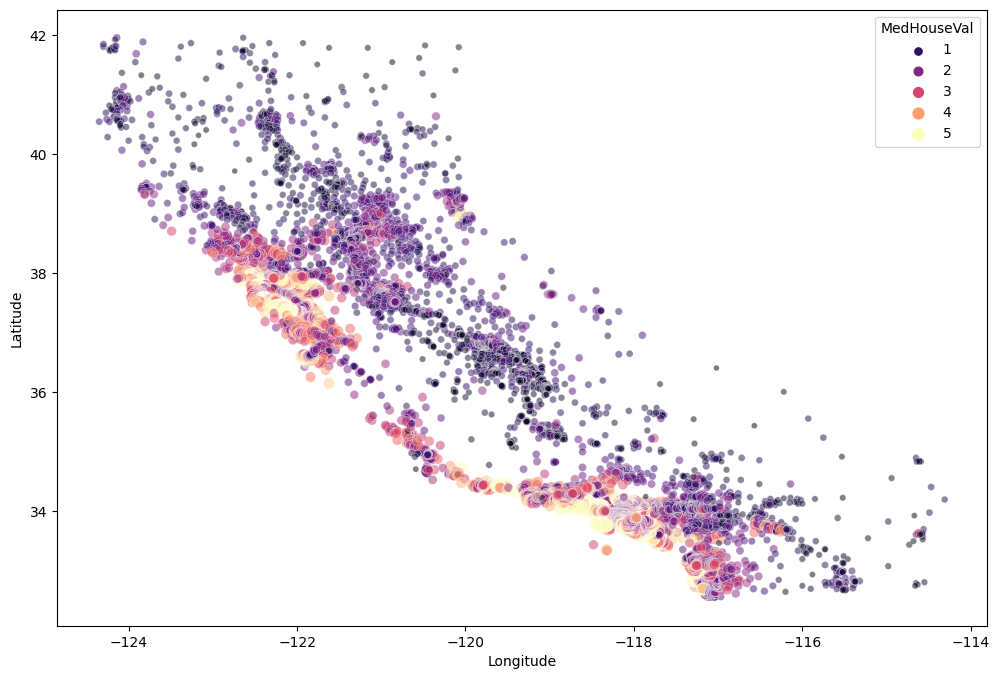

In [20]:
x, y = fetch_california_housing(as_frame=True, return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=x, x='Longitude', y='Latitude', size=y, alpha=0.5, hue=y, palette='magma')
plt.show()

In [21]:
checkpoint = keras.callbacks.ModelCheckpoint("california.h5", save_best_only=True)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer="l2", input_shape=[x_train.shape[1]]),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer="l2"),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-2, weight_decay=0.1),
              metrics=['mae'])

history = model.fit(
    x_train, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/150
194/194 [==============================] - 2s 6ms/step - loss: 1.0316 - mae: 0.9832 - val_loss: 0.9329 - val_mae: 0.9184
Epoch 2/150
194/194 [==============================] - 1s 4ms/step - loss: 0.8903 - mae: 0.8844 - val_loss: 0.9220 - val_mae: 0.9202
Epoch 3/150
194/194 [==============================] - 1s 4ms/step - loss: 0.8808 - mae: 0.8797 - val_loss: 0.9604 - val_mae: 0.9601
Epoch 4/150
194/194 [==============================] - 1s 4ms/step - loss: 0.8801 - mae: 0.8794 - val_loss: 0.9326 - val_mae: 0.9322
Epoch 5/150
194/194 [==============================] - 1s 5ms/step - loss: 0.8783 - mae: 0.8776 - val_loss: 0.9303 - val_mae: 0.9298
Epoch 6/150
194/194 [==============================] - 1s 6ms/step - loss: 0.8768 - mae: 0.8763 - val_loss: 0.9402 - val_mae: 0.9398
Epoch 7/150
194/194 [==============================] - 1s 6ms/step - loss: 0.8779 - mae: 0.8777 - val_loss: 0.9122 - val_mae: 0.9121
Epoch 8/150
194/194 [==============================] - 1s 4ms/step - 

Here, we've got a simple MLP, with a bit of Dropout and Batch Normalization to battle overfitting, optimized with the RMSprop optimizer and a Mean Absolute Error loss. We've fitted the model for 150 epochs, with a validation split of 0.2, and a ModelCheckpoint callback to save the weights in a file. Running this results in:

In [22]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.9027 - mae: 0.9027


[0.9026514887809753, 0.9026514887809753]

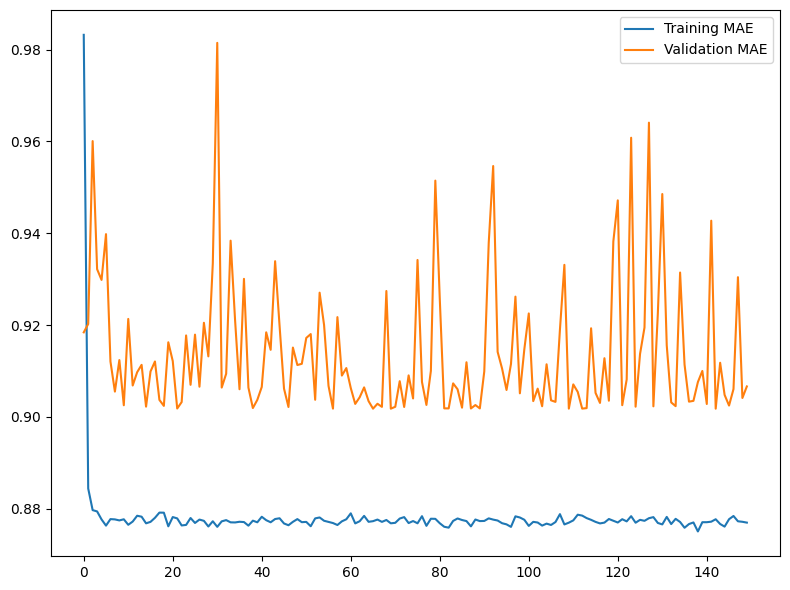

In [23]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["mae"],
        label="Training MAE")
ax.plot(np.arange(0, num_epochs), model_history["val_mae"],
        label="Validation MAE")
ax.legend()

plt.tight_layout()
plt.show()

162/162 [==============================] - 0s 2ms/step


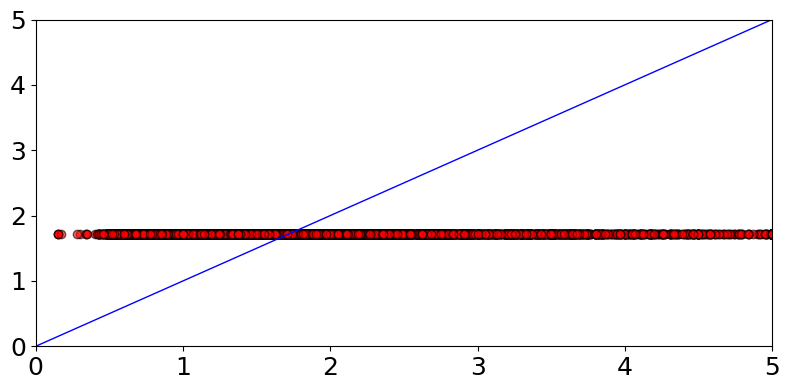

In [24]:
test_predictions = model.predict(x_test)
test_labels = y_test

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(test_labels, test_predictions, alpha=0.6,
            color='#FF0000', lw=1, ec='black')
lims = [0, 5]

plt.plot(lims, lims, lw=1, color='#0000FF')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(lims)
plt.ylim(lims)

plt.tight_layout()
plt.show()